- Invoice ID	: 자동 생성 식별 번호
- Branch : 지사 명
- City : 마켓이 위치한 도시 이름 
- Customer type : 
    - Member  : 회원카드 사용
    - Normal  : 회원카드 미사용
- Gender : 성별
- Product line: 품목 분류
- Unit price : 단가
- Quantity : 수량
- Tax 5% : 세금 5%
- Total : 전체 금액
- Date : 날짜
- Time : 시간 
- Payment : 결제방법
- cogs : 매출원가
- gross margin percentage : 이익률
- gross income : 이익
- Rating : 고객에 평가한 쇼핑경험에 대한 점수(1~10)

In [249]:
import pandas as pd
df = pd.read_csv('data/supermarket.csv')

### 사장님이 오늘 나한테 업무를 주셨다. 
올해 연말에 더 많은 물건 들을 팔기 위하여 데이터를 뽑아내라고 하는 것이다.  
흠,,, 나는 어떻게 하는 게 좋을까? 사장님이 보시기 편해야 하는데...  

1.일단 가장 가까운 연도의 데이터를 뽑아서 요일과 시간별로 정리를 하고 가장 많이 쓴 요일과 가장 많이 쓰는 시간을 정리해보자!

2.그리고 어떤 성별이 가장 많이 돈을 썼는지 찾아보자  

3.마지막으로는 그 성별이 어떤 부분에 가장 많이 돈을 썼는지 찾아보고 돈을 많이 쓴 시간대에 그 물건을
 더 홍보 하면 어떨 것 같은지 시각화 그래프를 써서 올려드리자!  
내가 분석한 데이터가 사장님 마음에 들어서 이번 연말에 보너스를 받을 수 있을까?  

In [250]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline
import platform
import pandas as pd
import seaborn as sns

In [251]:
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [252]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [253]:
#데이터에 결측치가 있는지 먼저 확인해본다. 전부 false라서 결측치가 존재 하지는 않는 것으로 보인다
df.isnull()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [254]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [255]:
#데이터 전처리 (내가 쓰지 않을 컬럼을 삭제한다, 그리고 새로운 변수명에 넣어주었습니다.)
df1=df.drop(columns=['Invoice ID','City','Unit price','Tax 5%','Payment','cogs','Rating'])
df1

,Branch,Customer type,Gender,Product line,Quantity,Total,Date,Time,gross margin percentage,gross income
0,A,Member,Female,Health and beauty,7,548.9715,1/5/2019,13:08,4.761905,26.1415
1,C,Normal,Female,Electronic accessories,5,80.2200,3/8/2019,10:29,4.761905,3.8200
2,A,Normal,Male,Home and lifestyle,7,340.5255,3/3/2019,13:23,4.761905,16.2155
3,A,Member,Male,Health and beauty,8,489.0480,1/27/2019,20:33,4.761905,23.2880
4,A,Normal,Male,Sports and travel,7,634.3785,2/8/2019,10:37,4.761905,30.2085
...,...,...,...,...,...,...,...,...,...,...
995,C,Normal,Male,Health and beauty,1,42.3675,1/29/2019,13:46,4.761905,2.0175
996,B,Normal,Female,Home and lifestyle,10,1022.4900,3/2/2019,17:16,4.761905,48.6900
997,A,Member,Male,Food and beverages,1,33.4320,2/9/2019,13:22,4.761905,1.5920
998,A,Normal,Male,Home and lifestyle,1,69.1110,2/22/2019,15:33,4.761905,3.2910


In [256]:
#삭제가 제대로 됐는지 확인하기!
df1

,Branch,Customer type,Gender,Product line,Quantity,Total,Date,Time,gross margin percentage,gross income
0,A,Member,Female,Health and beauty,7,548.9715,1/5/2019,13:08,4.761905,26.1415
1,C,Normal,Female,Electronic accessories,5,80.2200,3/8/2019,10:29,4.761905,3.8200
2,A,Normal,Male,Home and lifestyle,7,340.5255,3/3/2019,13:23,4.761905,16.2155
3,A,Member,Male,Health and beauty,8,489.0480,1/27/2019,20:33,4.761905,23.2880
4,A,Normal,Male,Sports and travel,7,634.3785,2/8/2019,10:37,4.761905,30.2085
...,...,...,...,...,...,...,...,...,...,...
995,C,Normal,Male,Health and beauty,1,42.3675,1/29/2019,13:46,4.761905,2.0175
996,B,Normal,Female,Home and lifestyle,10,1022.4900,3/2/2019,17:16,4.761905,48.6900
997,A,Member,Male,Food and beverages,1,33.4320,2/9/2019,13:22,4.761905,1.5920
998,A,Normal,Male,Home and lifestyle,1,69.1110,2/22/2019,15:33,4.761905,3.2910


In [257]:
# 데이터 타입을 확인하기
df1.dtypes

Branch                      object
Customer type               object
Gender                      object
Product line                object
Quantity                     int64
Total                      float64
Date                        object
Time                        object
gross margin percentage    float64
gross income               float64
dtype: object

In [258]:
#날짜와 시간 관련 데이터는 데이트 타임으로 형변환을 해주었습니다.
df1['date'] = pd.to_datetime(df['Date'])
df1['time'] = pd.to_datetime(df['Time'])

In [259]:
#데이트타임으로 요일을 뽑아서 새로운 컬러명으로 추가해주었습니다
df1['weekday'] = df1['date'].dt.weekday
df1

,Branch,Customer type,Gender,Product line,Quantity,Total,Date,Time,gross margin percentage,gross income,date,time,weekday
0,A,Member,Female,Health and beauty,7,548.9715,1/5/2019,13:08,4.761905,26.1415,2019-01-05,2022-10-21 13:08:00,5
1,C,Normal,Female,Electronic accessories,5,80.2200,3/8/2019,10:29,4.761905,3.8200,2019-03-08,2022-10-21 10:29:00,4
2,A,Normal,Male,Home and lifestyle,7,340.5255,3/3/2019,13:23,4.761905,16.2155,2019-03-03,2022-10-21 13:23:00,6
3,A,Member,Male,Health and beauty,8,489.0480,1/27/2019,20:33,4.761905,23.2880,2019-01-27,2022-10-21 20:33:00,6
4,A,Normal,Male,Sports and travel,7,634.3785,2/8/2019,10:37,4.761905,30.2085,2019-02-08,2022-10-21 10:37:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Normal,Male,Health and beauty,1,42.3675,1/29/2019,13:46,4.761905,2.0175,2019-01-29,2022-10-21 13:46:00,1
996,B,Normal,Female,Home and lifestyle,10,1022.4900,3/2/2019,17:16,4.761905,48.6900,2019-03-02,2022-10-21 17:16:00,5
997,A,Member,Male,Food and beverages,1,33.4320,2/9/2019,13:22,4.761905,1.5920,2019-02-09,2022-10-21 13:22:00,5
998,A,Normal,Male,Home and lifestyle,1,69.1110,2/22/2019,15:33,4.761905,3.2910,2019-02-22,2022-10-21 15:33:00,4


In [260]:
#그냥 뽑아내면 요일이 숫자로 출력이 되기 때문에 월 화 수 목 금으로 바꿔서 다시 넣어주었습니다.
weekday_list = ['월', '화', '수', '목', '금', '토', '일']
df1['요일'] = df1.apply(lambda x : weekday_list[x['weekday']], axis = 1)
df1

,Branch,Customer type,Gender,Product line,Quantity,Total,Date,Time,gross margin percentage,gross income,date,time,weekday,요일
0,A,Member,Female,Health and beauty,7,548.9715,1/5/2019,13:08,4.761905,26.1415,2019-01-05,2022-10-21 13:08:00,5,토
1,C,Normal,Female,Electronic accessories,5,80.2200,3/8/2019,10:29,4.761905,3.8200,2019-03-08,2022-10-21 10:29:00,4,금
2,A,Normal,Male,Home and lifestyle,7,340.5255,3/3/2019,13:23,4.761905,16.2155,2019-03-03,2022-10-21 13:23:00,6,일
3,A,Member,Male,Health and beauty,8,489.0480,1/27/2019,20:33,4.761905,23.2880,2019-01-27,2022-10-21 20:33:00,6,일
4,A,Normal,Male,Sports and travel,7,634.3785,2/8/2019,10:37,4.761905,30.2085,2019-02-08,2022-10-21 10:37:00,4,금
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Normal,Male,Health and beauty,1,42.3675,1/29/2019,13:46,4.761905,2.0175,2019-01-29,2022-10-21 13:46:00,1,화
996,B,Normal,Female,Home and lifestyle,10,1022.4900,3/2/2019,17:16,4.761905,48.6900,2019-03-02,2022-10-21 17:16:00,5,토
997,A,Member,Male,Food and beverages,1,33.4320,2/9/2019,13:22,4.761905,1.5920,2019-02-09,2022-10-21 13:22:00,5,토
998,A,Normal,Male,Home and lifestyle,1,69.1110,2/22/2019,15:33,4.761905,3.2910,2019-02-22,2022-10-21 15:33:00,4,금


In [261]:
# 내가 가진 데이터의 year 어디까지 인지 확인해보기 위해 특정 연도를 조회하는 코드를 써서 조회해보았다 
target_year = 2019
df1.query('date.dt.year == @target_year')

,Branch,Customer type,Gender,Product line,Quantity,Total,Date,Time,gross margin percentage,gross income,date,time,weekday,요일
0,A,Member,Female,Health and beauty,7,548.9715,1/5/2019,13:08,4.761905,26.1415,2019-01-05,2022-10-21 13:08:00,5,토
1,C,Normal,Female,Electronic accessories,5,80.2200,3/8/2019,10:29,4.761905,3.8200,2019-03-08,2022-10-21 10:29:00,4,금
2,A,Normal,Male,Home and lifestyle,7,340.5255,3/3/2019,13:23,4.761905,16.2155,2019-03-03,2022-10-21 13:23:00,6,일
3,A,Member,Male,Health and beauty,8,489.0480,1/27/2019,20:33,4.761905,23.2880,2019-01-27,2022-10-21 20:33:00,6,일
4,A,Normal,Male,Sports and travel,7,634.3785,2/8/2019,10:37,4.761905,30.2085,2019-02-08,2022-10-21 10:37:00,4,금
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Normal,Male,Health and beauty,1,42.3675,1/29/2019,13:46,4.761905,2.0175,2019-01-29,2022-10-21 13:46:00,1,화
996,B,Normal,Female,Home and lifestyle,10,1022.4900,3/2/2019,17:16,4.761905,48.6900,2019-03-02,2022-10-21 17:16:00,5,토
997,A,Member,Male,Food and beverages,1,33.4320,2/9/2019,13:22,4.761905,1.5920,2019-02-09,2022-10-21 13:22:00,5,토
998,A,Normal,Male,Home and lifestyle,1,69.1110,2/22/2019,15:33,4.761905,3.2910,2019-02-22,2022-10-21 15:33:00,4,금


In [262]:
#2019년도는 조회가 되고 2020,2021, 이후로 조회가 되지 않는 것을 보아 가장 최신 자료인 2019년도 자료로 시각화 자료를 만들었습니다.
# 아래는 2020년으로 조회 했을 때 조회가 되지 않는 걸 볼 수 있습니다.
target_year = 2020
df1.query('date.dt.year == @target_year')

,Branch,Customer type,Gender,Product line,Quantity,Total,Date,Time,gross margin percentage,gross income,date,time,weekday,요일


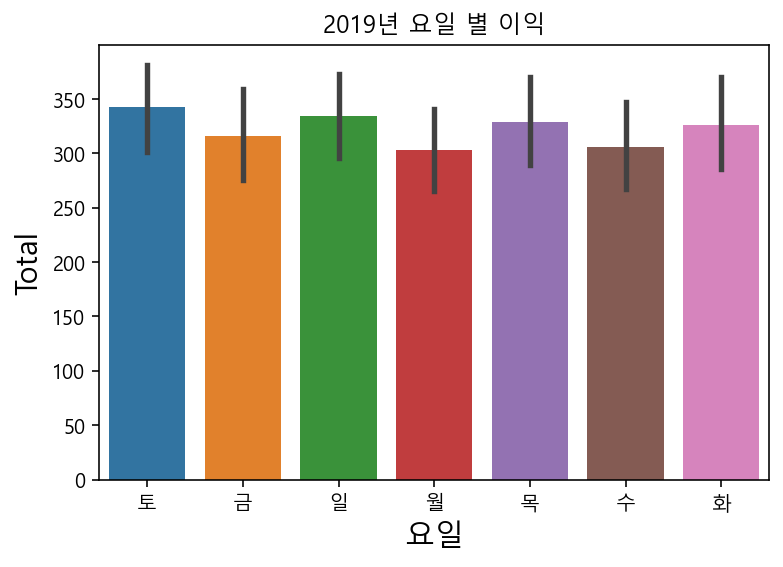

In [263]:
#bar 그래프로 x축에 요일을 y축에 비용일 넣어주어서 비교했습니다.
#토요일에 가장 많은 금액을 썼다는 것을 볼 수 있습니다 즉 우리 마트는 토요일에 가장 많은 돈을 벌었습니다.
sns.barplot(data=df1,x='요일',y='Total')
plt.title('2019년 요일 별 이익')
plt.rc('axes', labelsize=15)
plt.xlabel('요일')
plt.show()

In [264]:
#이번에는 요일 별 방문자수를 보기 위해서 요일을 밸류 카운트를 해주었을 때 토요일에 가장 많이 방문했다는 것을 알 수 있습니다.
df1['요일'].value_counts()

토    164
화    158
수    143
금    139
목    138
일    133
월    125
Name: 요일, dtype: int64

<AxesSubplot:xlabel='요일', ylabel='count'>

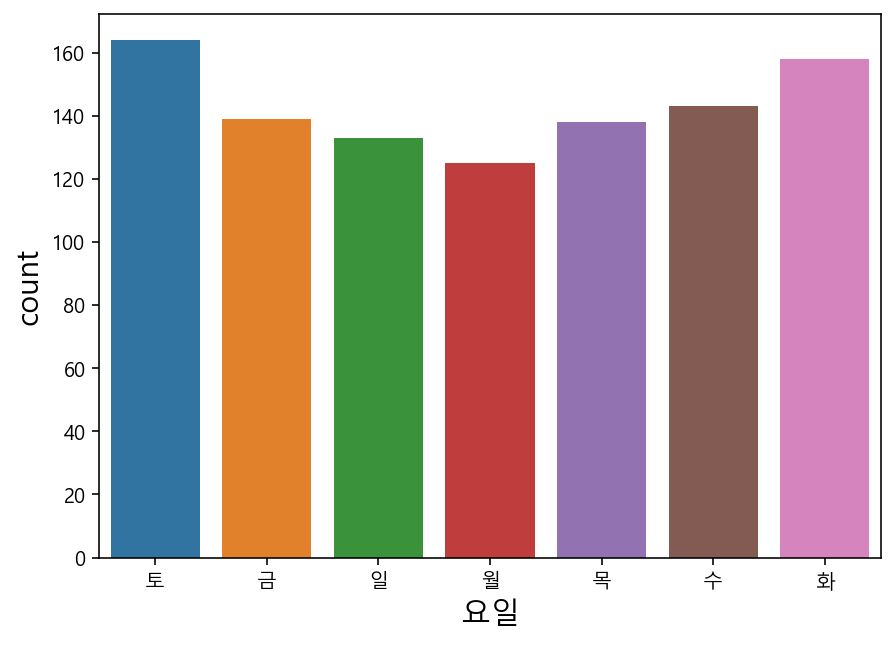

In [265]:
#이번에는 count 그래프를 써서 요일만 비교해보았습니다. 
#이 그래프를 통해 요일별로 방문자 수를 확인 해보았습니다.
plt.figure(figsize=[7,5])
sns.countplot(data=df1,x='요일')

#### 위 2019년 월 요일 별 수익률과, 아래 요일 별 방문자 수를 비교해봤을 때   
우리는 수요일 같은 경우 방문자 수에 비해서 수익률이 떨어지는 것을 확인 할수가 있습니다. 

수요일에 수익률을 조금 더 높여야 할 거 같습니다. 자 그럼 이제 시간대 별로 사용 금액을 알아보겠습니다.

In [266]:
#시간대별 이용현황을 보기 위해서  value_counts 를 해주었습니다. 
#저녁 7시와 오후 2시에 가장 많이 방문 한 것으로 확인이 되는데요 과연 금액도 그런지 확인 해보겠습니다.
df1['Time'].value_counts()

19:48    7
14:42    7
17:38    6
17:16    5
11:40    5
        ..
13:26    1
11:17    1
14:57    1
17:53    1
19:12    1
Name: Time, Length: 506, dtype: int64

In [267]:
#시간대 별 평균 사용 금액을 구하고 순서대로 정렬을 해주었습니다 
# 오후 2시와 저녁 7시에 가장 많은 금액을 쓴 것이 확인 됩니다.
df1['Hour'] = df1['time'].dt.hour
hour= df1.groupby('Hour',as_index = False)[['Total']].mean()
hour.sort_values(by='Total',ascending=False)

,Hour,Total
4,14,371.426494
9,19,351.323124
1,11,337.525883
3,13,337.118709
7,17,330.340784
6,16,327.614591
0,10,311.103772
10,20,306.260360
5,15,305.681456
2,12,292.875084


<AxesSubplot:xlabel='Hour', ylabel='Total'>

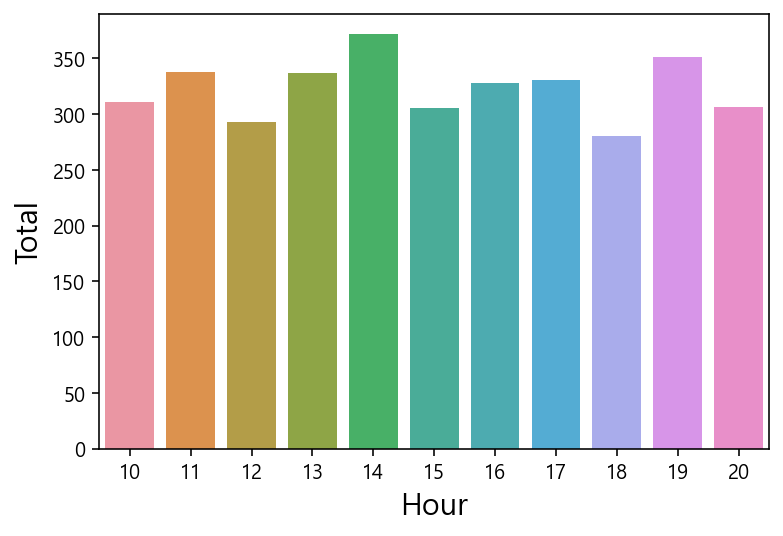

In [268]:
#사장님 보시기 편하라고 시각화를 해주었습니다.
#역시 표와 똑같은 결과가 나옵니다.
sns.barplot(data=hour,x='Hour',y='Total')

#### 자 그럼 이번에는 우리 마트에서 남자와 여자 중 어떤 성별이 더 많은 돈을 쓰는지 확인하여 주요 타켓을 정해보겠습니다

In [269]:
#그룹바이를 통해서 남자와 여자 중에 토탈 비용을 누가 더 많이 써는지 나타냈습니다
#인덱스를 꺼내주지 않아서 처음에 그래프가 만들어지지 않았습니다.그래서 인덱스를 꺼내주었습니다.
#시간은 남자보다 적게 있으나 더 많은 금액을 썼다는 것을 알 수 있습니다. 적은 시간에 많은 금액을 썼습니다.
df_total=df1.groupby('Gender',as_index = False)[['Total']].sum()
df_total

,Gender,Total
0,Female,167882.925
1,Male,155083.824


<AxesSubplot:xlabel='Gender', ylabel='Total'>

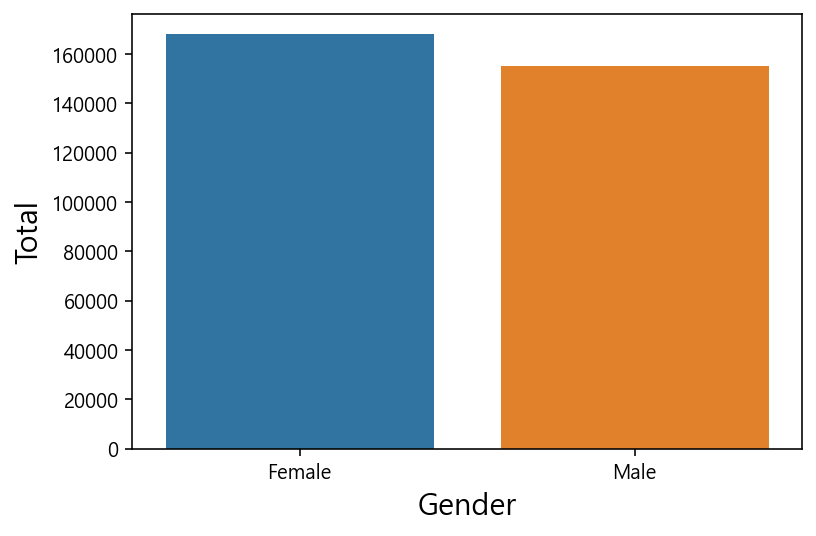

In [270]:
# 보기 편하도록 시각화 하였는데요 역시나 여자 쪽의 그래프가 더 높다는 것을 확인 할 수 있습니다.
#x에 범주형을 넣어주었고 y에 연속형을 넣어서 그래프를 만들었습니다.
sns.barplot(data=df_total,x='Gender',y='Total')

### 우리는 위의 여러가지 데이터와 그래프 통해서 알아낸 것들을 정리해보겠습니다. 
1.우리 마트에서 가장 돈을 많이 쓰는 성별은 여성이다.  
2 우리 마트에서 제일 많이 이용하는 시간은 오후 2시와 오후 19시이다  
3.수요일은 방문수에 비해서 수익이 적은 편이다

그래서 지금 부터는 여성이 가장 소비를 많이 하는 부분과 수요일에 가장 많이 팔리는 물건 항목을 알아보겠습니다.

In [271]:
df1['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [272]:
# 필요한 항목만 쓰기 위해서 피봇 테이블로 품목 별로 요일에 대한 총금액을 뽑아보았습니다.
pay=pd.pivot_table(data=df1,index='Product line',columns='요일',values='Total',aggfunc='mean')
pay

요일,금,목,수,월,일,토,화
Product line,,,,,,,
Electronic accessories,285.185559,345.421125,270.272917,257.483739,320.593875,360.902889,348.652500
Fashion accessories,318.491950,367.899500,243.563625,356.640083,279.187125,307.969200,285.510750
Food and beverages,239.917263,339.929625,339.045000,300.555818,337.539848,302.432177,378.780635
Health and beauty,320.423654,293.814316,309.934026,324.932192,355.238250,390.018079,295.158259
Home and lifestyle,286.475875,285.647526,340.779711,304.767225,377.259094,383.666937,350.396932
Sports and travel,424.285370,320.862196,326.707500,275.101313,318.884562,342.991500,301.208654


In [273]:
#여기서 iloc로 수요일 항목만 뽑아내서 정렬해주었습니다.
#수요일에는 Home and lifestyle 항목이 가장 많이 팔린 걸 알 수 있습니다.
#가장 적게 팔린 것은 Electronic accessories 과 Fashion accessories 입니다,
Pay=pay.iloc[[0,1,2,3,4,5],[2]]
Pay=Pay.sort_values(by='수',ascending=False)
Pay

요일,수
Product line,
Home and lifestyle,340.779711
Food and beverages,339.045000
Sports and travel,326.707500
Health and beauty,309.934026
Electronic accessories,270.272917
Fashion accessories,243.563625


In [274]:
#그럼 우리가 알고 싶었던 여자 분들은 무엇을 가장 많이 산 것은 역시나 Home and lifestyle 입니다
# 가장 Fashion accessories 과 Health and beauty 상품인 것을 알 수 있습니다
Genderdata=pd.pivot_table(data=df1,index='Product line',columns='Gender',values='Total',aggfunc='mean')
Genderdata=Genderdata.sort_values(by='Female',ascending=False)
Genderdata

Gender,Female,Male
Product line,,
Home and lifestyle,380.213639,294.136241
Food and beverages,368.565750,273.499125
Sports and travel,324.712739,340.360327
Electronic accessories,322.643125,316.691965
Fashion accessories,317.056250,291.079207
Health and beauty,290.015414,348.099460


나의 결론 : Health and beauty와 Food and beverages 에는 여성분들을 저격 할만한 많은 새로운 제품을 들여오고
이번 한 달 간은 수요일에는 14시와 19시에 Health and beauty과 Fashion accessories에 세일을 하는 것이 좋을 것 같습니다
여기까지 저의 보고서였습니다 봐주셔서 감사합니다!